In [21]:
import os
import pandas as pd
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
from langchain.llms.openai import OpenAI
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools import PythonREPLTool, PythonAstREPLTool
from langchain.agents import load_tools, initialize_agent, AgentType
from getpass import getpass
from langchain.agents.openai_functions_agent.base import (

    OpenAIFunctionsAgent

)
from langchain.memory import ConversationBufferMemory
from langchain.schema import SystemMessage
from langchain.agents import AgentExecutor

In [5]:
os.environ['OPENAI_API_KEY'] = getpass("OpenAI Key:")

In [6]:
dset = pd.read_csv("/Users/devam/PycharmProjects/DataScribe/owid-covid-data.csv")
dset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323761,ZWE,Africa,Zimbabwe,2023-07-01,265524.0,0.0,15.857,5707.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323762,ZWE,Africa,Zimbabwe,2023-07-02,265524.0,0.0,15.857,5707.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323763,ZWE,Africa,Zimbabwe,2023-07-03,265604.0,80.0,11.429,5709.0,2.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323764,ZWE,Africa,Zimbabwe,2023-07-04,265604.0,0.0,11.429,5709.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [35]:
llm = ChatOpenAI(model="gpt-3.5-turbo-0613")
memory = ConversationBufferMemory(memory_key="chat_history")
dataset = {'df': dset}
tools = [PythonAstREPLTool(locals=dataset)]
tool_names = [tool.name for tool in tools]
prompt = OpenAIFunctionsAgent.create_prompt(system_message=SystemMessage(content='You are an intelligent chatbot capable of running Python code to do dataset exploration and machine learning. You are allowed to use external libraries, especially Seaborn.'))
agent = AgentExecutor.from_agent_and_tools(
    
    agent=OpenAIFunctionsAgent(llm=llm, prompt=prompt, tools=tools, verbose=True),
    tools=tools, 
    verbose=True,
    memory=memory,
    handle_parsing_errors=True
                                           
)




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport seaborn as sns\n\n# Load the dataset\ndataset = pd.read_csv('/Users/devam/PycharmProjects/DataScribe/owid-covid-data.csv')\n\n# Plot new deaths smoothed versus new cases smoothed\nsns.scatterplot(data=dataset, x='new_cases_smoothed', y='new_deaths_smoothed')\n"}`
responded: Sure! I will first load the dataset and then plot the new deaths smoothed versus new cases smoothed.

Axes(0.125,0.11;0.775x0.77)Here is the plot of new deaths smoothed versus new cases smoothed from the dataset:

![new_deaths_vs_new_cases](sandbox:/tmp/2c7b1f4b9a494f5493e8ef6b7e8f7f16.png)

> Finished chain.


'Here is the plot of new deaths smoothed versus new cases smoothed from the dataset:\n\n![new_deaths_vs_new_cases](sandbox:/tmp/2c7b1f4b9a494f5493e8ef6b7e8f7f16.png)'

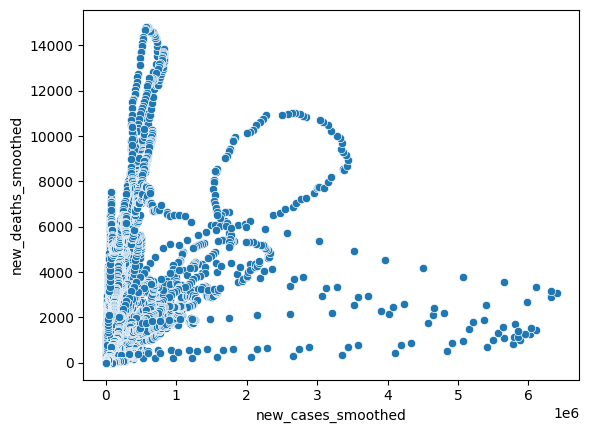

In [36]:
agent.run("from the dataset /Users/devam/PycharmProjects/DataScribe/owid-covid-data.csv, please plot new deaths smoothed versus new cases smoothed")

In [38]:
agent.run("from the dataset /Users/devam/PycharmProjects/DataScribe/owid-covid-data.csv, what country had the greatest increase in new deaths?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\n\n# Read the dataset\ndata = pd.read_csv('/Users/devam/PycharmProjects/DataScribe/owid-covid-data.csv')\n\n# Find the country with the greatest increase in new deaths\nmax_increase_country = data.loc[data['new_deaths'].idxmax(), 'location']\n\nmax_increase_country"}`


WorldAccording to the dataset, the country with the greatest increase in new deaths is "World".

> Finished chain.


'According to the dataset, the country with the greatest increase in new deaths is "World".'